<h1 style="color:green"><center>Don't forget to upvote if you like it! It's free! :)

**For Detail EDA(Exploratory Data Analysis) do check the notebook**

# [Beginners Notebook with EDA](https://www.kaggle.com/harshkothari21/beginners-notebook-90-accuracy-with-eda)

# Table of content 

- Handle Missing Values
- Feature Engineering
- linear Regression
- Logistic Regression
- Scalling
- KNN Classifier
- Support Vector Machine(SVM)
- Kernelize SVM
- Decision Tree
- Random Forest

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
from statistics import mode
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

# Handle Missing Values

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

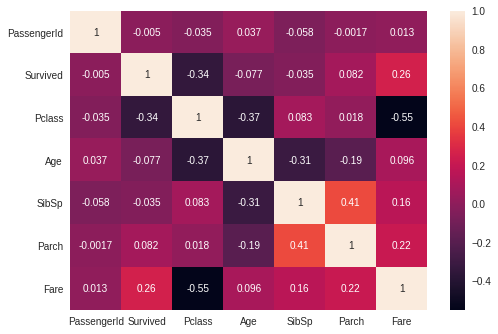

In [5]:
sns.heatmap(train.corr(), annot=True)

> **Pclass and age, as they had max relation in the entire set we are going to replace missing age values with median age calculated per class**

In [6]:
train.loc[train.Age.isnull(), 'Age'] = train.groupby("Pclass").Age.transform('median')


#Same thing for test set
test.loc[test.Age.isnull(), 'Age'] = test.groupby("Pclass").Age.transform('median')

In [7]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

> **As maximum values in train set is S let's replace it with the null values**

In [8]:
train['Embarked'] = train['Embarked'].fillna(mode(train['Embarked']))

#Applying the same technique for test set
test['Embarked'] = test['Embarked'].fillna(mode(test['Embarked']))

> Also, corr(Fare, Pclass) is the highest correlation in absolute numbers for 'Fare', so we'll use Pclass again to impute the missing values!

In [9]:
train['Fare']  = train.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
test['Fare']  = test.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

In [10]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
D              3
              ..
D37            1
F38            1
A36            1
B41            1
E58            1
Name: Cabin, Length: 147, dtype: int64

> So many different values let's place missing values with U as "Unknown"

In [11]:
train['Cabin'] = train['Cabin'].fillna('U')
test['Cabin'] = test['Cabin'].fillna('U')

# Feature Engineering

In [12]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

> Sex is categorical data so we can replace male to 0 and femail to 1

In [13]:
train['Sex'][train['Sex'] == 'male'] = 0
train['Sex'][train['Sex'] == 'female'] = 1

test['Sex'][test['Sex'] == 'male'] = 0
test['Sex'][test['Sex'] == 'female'] = 1

In [14]:
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

> Let's encode with OneHotEncoder technique

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
train = train.join(temp)
train.drop(columns='Embarked', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Embarked']]).toarray(), columns=['S', 'C', 'Q'])
test = test.join(temp)
test.drop(columns='Embarked', inplace=True)

In [16]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'S', 'C', 'Q'],
      dtype='object')

In [17]:
train.Cabin.tolist()

['U',
 'C85',
 'U',
 'C123',
 'U',
 'U',
 'E46',
 'U',
 'U',
 'U',
 'G6',
 'C103',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D56',
 'U',
 'A6',
 'U',
 'U',
 'U',
 'C23 C25 C27',
 'U',
 'U',
 'U',
 'B78',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D33',
 'U',
 'B30',
 'C52',
 'U',
 'U',
 'U',
 'U',
 'U',
 'B28',
 'C83',
 'U',
 'U',
 'U',
 'F33',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'F G73',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'C23 C25 C27',
 'U',
 'U',
 'U',
 'E31',
 'U',
 'U',
 'U',
 'A5',
 'D10 D12',
 'U',
 'U',
 'U',
 'U',
 'D26',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'C110',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'B58 B60',
 'U',
 'U',
 'U',
 'U',
 'E101',
 'D26',
 'U',
 'U',
 'U',
 'F E69',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'D47',
 'C123',
 'U',
 'B86',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'U',
 'F2',
 'U',
 'U',
 'C2'

> We can get the alphabets by running regular expression

In [18]:
train['Cabin'] = train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['Cabin'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [19]:
train.Cabin.unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [20]:
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
train['Cabin'] = train['Cabin'].map(cabin_category)
test['Cabin'] = test['Cabin'].map(cabin_category)

In [21]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [22]:
train['Name'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
test['Name'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [23]:
train['Name'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

**Wohh that's lot's of title. So, let's bundle them**


In [24]:
train.rename(columns={'Name' : 'Title'}, inplace=True)
train['Title'] = train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
                                      
test.rename(columns={'Name' : 'Title'}, inplace=True)
test['Title'] = test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

In [25]:
train['Title'].value_counts(normalize = True) * 100

Mr        58.024691
Miss      20.426487
Mrs       14.029181
Master     4.489338
Other      3.030303
Name: Title, dtype: float64

Better! let's convert to numeric

In [26]:
encoder = OneHotEncoder()
temp = pd.DataFrame(encoder.fit_transform(train[['Title']]).toarray())
train = train.join(temp)
train.drop(columns='Title', inplace=True)

temp = pd.DataFrame(encoder.transform(test[['Title']]).toarray())
test = test.join(temp)
test.drop(columns='Title', inplace=True)

Hmmm... but we know from part 2 that Sibsp is the number of siblings / spouses aboard the Titanic, and Parch is the number of parents / children aboard the Titanic... So, what is another straightforward feature to engineer?
Yes, it is the size of each family aboard!


In [27]:
train['familySize'] = train['SibSp'] + train['Parch'] + 1
test['familySize'] = test['SibSp'] + test['Parch'] + 1

In [28]:
# Drop redundant features
train = train.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)
test = test.drop(['SibSp', 'Parch', 'Ticket'], axis = 1)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,S,C,Q,0,1,2,3,4,familySize
0,1,0,3,0,22.0,7.2500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
1,2,1,1,1,38.0,71.2833,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2,3,1,3,1,26.0,7.9250,9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
3,4,1,1,1,35.0,53.1000,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
4,5,0,3,0,35.0,8.0500,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


Dateset is completely ready now!


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis=1), train['Survived'], test_size = 0.2, random_state=2)

# Linear Regression

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.

In [31]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(linreg.score(X_test, y_test)))

R-Squared for Train set: 0.460
R-Squared for test set: 0.374


it's clear from the score that linear regression doesn't makes sence

# Logistic Regression

As our target variable is discrete value(i.e 0 and 1) logistic regression is more likely to fit well the model

In [32]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, C=50)
logreg.fit(X_train, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train, y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test, y_test)))

R-Squared for Train set: 0.848
R-Squared for test set: 0.804


> Haha, much better!

> **Additionally, you can view the y-intercept and coefficients**

In [33]:
print(logreg.intercept_)
print(logreg.coef_)

[2.42949177]
[[-1.03810742e+00  4.18191597e+00 -4.08395940e-02  2.80675528e-03
  -8.43953571e-02  7.83975911e-01  6.86991958e-01  4.68355222e-01
   3.32847449e+00 -1.34685647e+00 -9.62563422e-02 -8.68393066e-02
   1.40800717e-01 -4.79693005e-01]]


# MinMaxScaler




# Magic Weapon#1: **Let's Scale our data and re-train the model**

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [35]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_scaled, y_train)

#R-Squared Score
print("R-Squared for Train set: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("R-Squared for test set: {:.3f}" .format(logreg.score(X_test_scaled, y_test)))

R-Squared for Train set: 0.850
R-Squared for test set: 0.804


**Let's try some other Techniques**

# KNN Classifier

K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms.KNN algorithm used for both classification and regression problems.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knnclf = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
knnclf.fit(X_train, y_train)
y_pred = knnclf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7262569832402235


### Let's try on scaled data

In [38]:
knnclf = KNeighborsClassifier(n_neighbors=7)

# Train the model using the scaled training sets
knnclf.fit(X_train_scaled, y_train)
y_pred = knnclf.predict(X_test_scaled)

In [39]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7988826815642458


### That increases the accuracy a lot!

# Support Vector Machine(SVM)

In [40]:
from sklearn.svm import LinearSVC

svmclf = LinearSVC(C=50)
svmclf.fit(X_train, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svmclf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svmclf.score(X_test, y_test)))

Accuracy of Linear SVC classifier on training set: 0.66
Accuracy of Linear SVC classifier on test set: 0.71


**Let's try on scaled data**

In [41]:
svmclf = LinearSVC()
svmclf.fit(X_train_scaled, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svmclf.score(X_train_scaled, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svmclf.score(X_test_scaled, y_test)))

Accuracy of Linear SVC classifier on training set: 0.85
Accuracy of Linear SVC classifier on test set: 0.80


# Kernelize SVM


# Magic Weapon#2: **Support Vector Machine with RBF kernel**

In [42]:
from sklearn.svm import SVC

svcclf = SVC(gamma=0.1)
svcclf.fit(X_train, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svcclf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svcclf.score(X_test, y_test)))

Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.70


**Look Accuracy on Training data, lol**

In [43]:
svcclf = SVC(gamma=50)
svcclf.fit(X_train_scaled, y_train)

print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(svcclf.score(X_train_scaled, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(svcclf.score(X_test_scaled, y_test)))

Accuracy of Linear SVC classifier on training set: 0.91
Accuracy of Linear SVC classifier on test set: 0.79


# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtclf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtclf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.83
Accuracy of Decision Tree classifier on test set: 0.79


Performed Well!

# Random Forest

Secondly, I would like to introduce one of the most popular algorithms for classification (but also regression, etc), Random Forest! In a nutshell, Random Forest is an ensembling learning algorithm which combines decision trees in order to increase performance and avoid overfitting.

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(random_state=2)

# Magic Weapon #3: Hyperparameter Tuning

Below we set the hyperparameter grid of values with 4 lists of values:

- 'criterion' : A function which measures the quality of a split.
- 'n_estimators' : The number of trees of our random forest.
- 'max_features' : The number of features to choose when looking for the best way of splitting.
- 'max_depth' : the maximum depth of a decision tree.

In [46]:
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7]    
}

In [47]:
from sklearn.model_selection import GridSearchCV

randomForest_CV = GridSearchCV(estimator = rfclf, param_grid = param_grid, cv = 5)
randomForest_CV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 300, 500]})

Let's print our optimal hyperparameters set

In [48]:
randomForest_CV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 100}

In [49]:
rf_clf = RandomForestClassifier(random_state = 2, criterion = 'gini', max_depth = 7, max_features = 'auto', n_estimators = 100)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=2)

In [50]:
predictions = rf_clf.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions) * 100

78.77094972067039

Let's print our solutions

# Magic Weapon #4: All model Accuracy Score

In [52]:
#Linear Model
print("Linear Model R-Squared for Train set: {:.3f}".format(linreg.score(X_train, y_train)))
print("Linear Model R-Squared for test set: {:.3f}" .format(linreg.score(X_test, y_test)))
print()

#Logistic Regression
print("Logistic Regression R-Squared for Train set: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Logistic Regression R-Squared for test set: {:.3f}" .format(logreg.score(X_test_scaled, y_test)))
print()

#KNN Classifier
print("KNN Classifier Accuracy:",accuracy_score(y_test, y_pred))
print()

#SVM
print('SVM Accuracy on training set: {:.2f}'
     .format(svmclf.score(X_train_scaled, y_train)))
print('SVM Accuracy on test set: {:.2f}'
     .format(svmclf.score(X_test_scaled, y_test)))
print()

#Kerelize SVM
print('SVC Accuracy on training set: {:.2f}'
     .format(svcclf.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.2f}'
     .format(svcclf.score(X_test_scaled, y_test)))
print()

#Decision Tree
print('Accuracy of Decision Tree on training set: {:.2f}'
     .format(dtclf.score(X_train, y_train)))
print('Accuracy of Decision Tree on test set: {:.2f}'
     .format(dtclf.score(X_test, y_test)))
print()

#Random Forest
print('Random Forest Accuracy:{:.3f}'.format(accuracy_score(y_test, predictions) * 100))

Linear Model R-Squared for Train set: 0.460
Linear Model R-Squared for test set: 0.374

Logistic Regression R-Squared for Train set: 0.850
Logistic Regression R-Squared for test set: 0.804

KNN Classifier Accuracy: 0.7988826815642458

SVM Accuracy on training set: 0.85
SVM Accuracy on test set: 0.80

SVC Accuracy on training set: 0.91
Accuracy on test set: 0.79

Accuracy of Decision Tree on training set: 0.83
Accuracy of Decision Tree on test set: 0.79

Random Forest Accuracy:78.771


# Submitting the solutions

I am choosing SVC model for the instance, you can try submiting solution with different models

In [53]:
scaler = MinMaxScaler()

train_conv = scaler.fit_transform(train.drop(['Survived', 'PassengerId'], axis=1))
test_conv = scaler.transform(test.drop(['PassengerId'], axis = 1))

In [54]:
svcclf = SVC(gamma=50)
svcclf.fit(train_conv, train['Survived'])

SVC(gamma=50)

In [55]:
test['Survived'] = svcclf.predict(test_conv)

In [56]:
test[['PassengerId', 'Survived']].to_csv('MySubmission1.csv', index = False)

# Plz Upvote!